# LINEAR REGRESSION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('data//housing.data',delim_whitespace=True,header=None)
col_name=['CRIM','ZN','INDUS','CHAX','NOX','RM','AGE','DIS','RAD','TAX','PATRATIO','B','LSTAT','MEDV']
df.columns=col_name
df.head()

,CRIM,ZN,INDUS,CHAX,NOX,RM,AGE,DIS,RAD,TAX,PATRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
X=df['RM'].values.reshape(-1,1)


In [3]:
Y=df['MEDV'].values

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model=LinearRegression()

In [6]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_

array([9.10210898])

In [8]:
model.intercept_

-34.67062077643857

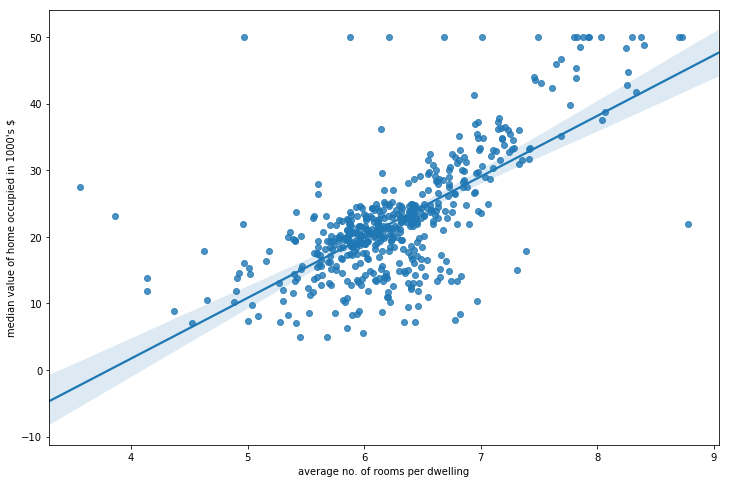

In [9]:
plt.figure(figsize=(12,8))
sns.regplot(X,Y)
plt.xlabel('average no. of rooms per dwelling')
plt.ylabel("median value of home occupied in 1000's $")
plt.show()

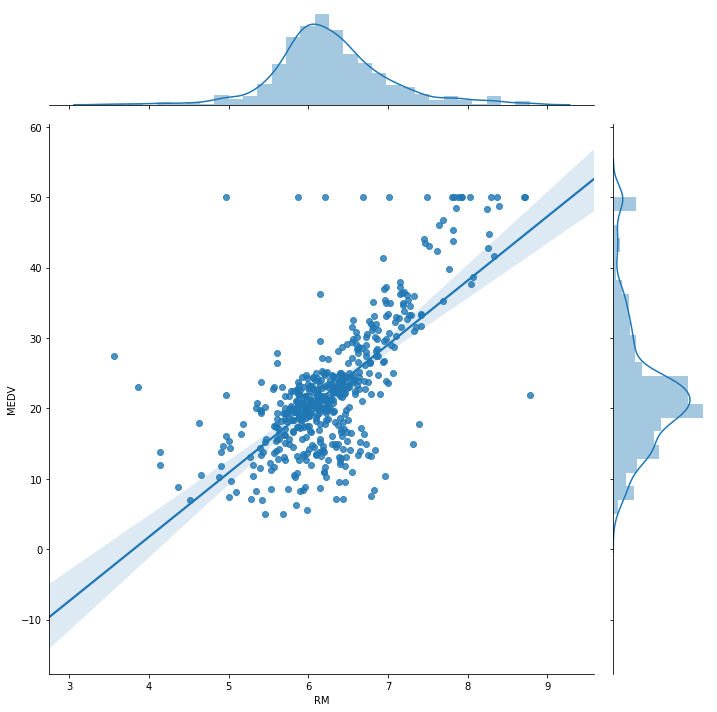

In [10]:
sns.jointplot(x='RM',y='MEDV',kind='reg',height=10,data=df)
plt.show()

In [11]:
import numpy as np
model.predict(np.array([5]).reshape(-1,1))

array([10.83992413])

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

Choose a class of model by importing the appropriate estimator class from Scikit- Learn.

Choose model hyperparameters by instantiating this class with desired values.

Arrange data into a features matrix and target vector.

Fit the model to your data by calling the fit() method of the model instance.

Apply the model to new data:
For supervised learning, often we predict labels for unknown data using the predict() method.
For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [12]:
# step-1
from sklearn.linear_model import LinearRegression
# step-2
model_2=LinearRegression()
#step-3
X=df['LSTAT'].values.reshape(-1,1)
Y=df['MEDV'].values
#step-4
model_2.fit(X,Y)
#step-5
model_2.predict(np.array([20]).reshape(-1,1))

array([15.5528538])

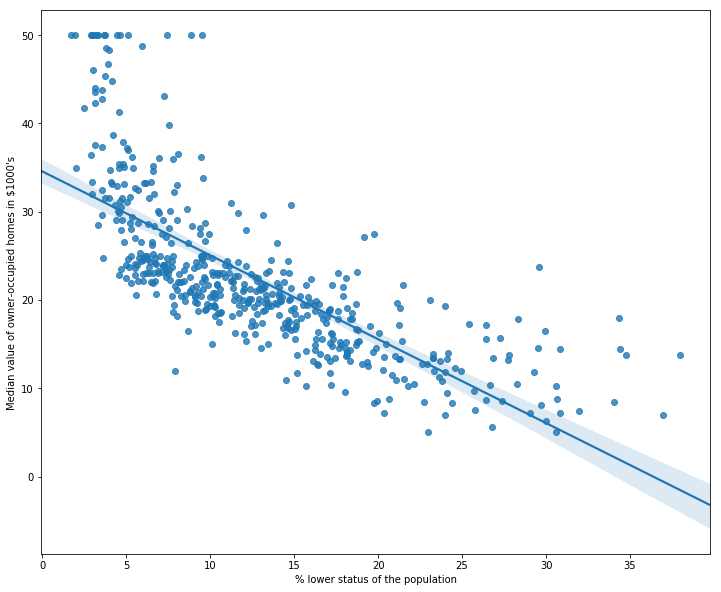

In [13]:

plt.figure(figsize=(12,10))
sns.regplot(X,Y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()


# ROBUST REGRESSION

link = http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

Each iteration performs the following steps:

Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).

Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.

Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [14]:
X=df['RM'].values.reshape(-1,1)
Y=df['MEDV'].values

In [16]:
from sklearn.linear_model import RANSACRegressor

In [17]:
model=RANSACRegressor()

In [18]:
model.fit(X,Y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [40]:
line_X=np.arange(3,10,1)
line_Y=model.predict(line_X.reshape(-1,1))

In [41]:
inlier_mask=model.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

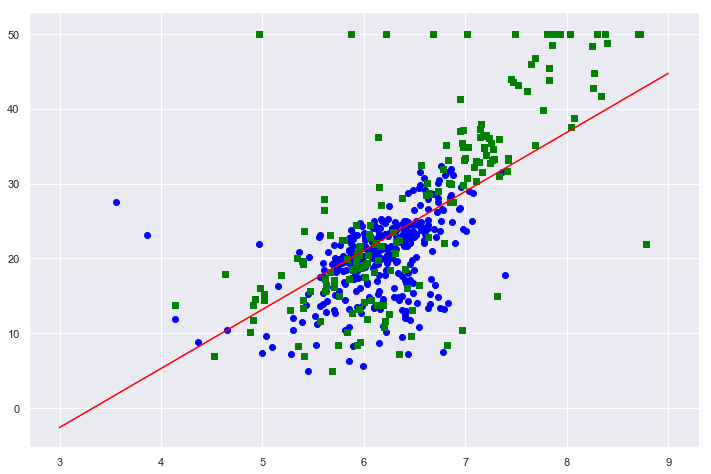

In [59]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask],Y[inlier_mask],marker='o',c='blue',label='inliers')
plt.scatter(X[outlier_mask],Y[outlier_mask],marker='s',c='green',label='outliers')
plt.plot(line_X,line_Y,color='red')
plt.xlabel=("average number of rooms per dwelling")
plt.ylabel=("Median value of owner-occupied homes in $1000's")

plt.show()

# In between LSTAT AND MEDV

In [60]:
x=df['LSTAT'].values.reshape(-1,1)
y=df['MEDV'].values
from sklearn.linear_model import RANSACRegressor
model_1=RANSACRegressor()
model_1.fit(x,y)
inlier_mask=model_1.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_x=np.arange(0,40,5)
line_y=model_1.predict(line_x.reshape(-1,1))

TypeError: 'str' object is not callable

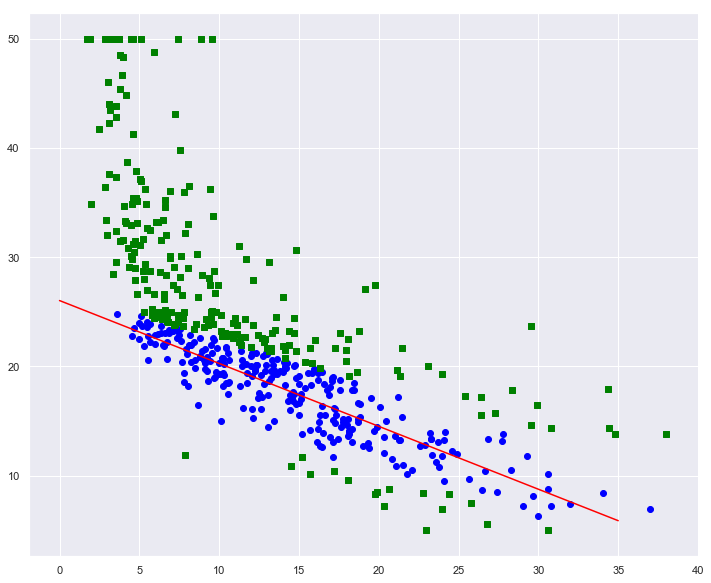

In [61]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(x[inlier_mask],y[inlier_mask],marker='o',c='blue',label='inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],marker='s',c='green',label='outliers')
plt.plot(line_x,line_y,color='red')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()